In [ ]:
# Operations on YobiYobaXML
# Yield an RTTM for evaluating SAD and diarization

In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
%load_ext rpy2.ipython
import rpy2.robjects.lib.ggplot2 as ggplot2
%R library(magick)
%R library(grid)
%R library(gridExtra)
%R library(RColorBrewer)

/home/stephan/.local/lib/python3.5/site-packages/rpy2/robjects/lib/ggplot2.py:67: UserWarning: This was designed againt ggplot2 version 2.2.1 but you have 3.1.0
  warnings.warn('This was designed againt ggplot2 version %s but you have %s' % (TARGET_VERSION, ggplot2.__version__))
/home/stephan/.local/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Linking to ImageMagick 7.0.8.23
Enabled features: fontconfig, freetype, lcms, x11
Disabled features: cairo, fftw, ghostscript, pango, rsvg, webp

  warnings.warn(x, RRuntimeWarning)


array(['RColorBrewer', 'gridExtra', 'grid', 'magick', 'ggplot2', 'tools',
       'stats', 'graphics', 'grDevices', 'utils', 'datasets', 'methods',
       'base'], dtype='<U12')

In [25]:
dataPath = '/shared_hd1/VMs/DiViMe/data/'

def readRTTM(table_path, label):
    print('Processing '+label+'...')
    rttm = pd.read_table(table_path, sep=' ',header=None)
    if label in ('yunitator_old','yunitator_universal','yunitator_english'):
        rttm.columns = ['speaker','file','channel','stime','duration','unk1','unk2','spkid','unk3','unk4']
    else:
        rttm.columns = ['speaker','file','channel','stime','duration','unk1','unk2','spkid','unk3']        
    rttm['spkid'] = [label +': '+x for x in rttm['spkid'].map(str)] 
    rttm['source'] = label
    rttm['etime'] = rttm['stime'] + rttm['duration']
    print('Success!')
    return(rttm)

def getSegmentProperties(SpeechSegment):
    return(SpeechSegment.attrib)

def  getWordProperties(Word):
    rdict = Word.attrib
    rdict['text'] = Word.text
    return(rdict)

def readYobiYoba(xml_path, returnType = 'segments'):
    tree = ET.parse(xml_path)
    root = tree.getroot()
    if returnType == 'segments':
        segments = pd.DataFrame([getSegmentProperties(SpeechSegment) for SpeechSegment in root.iter('SpeechSegment')])
        segments['etime'] = segments['etime'].astype(float)
        segments['stime'] = segments['stime'].astype(float)
        segments['duration'] =  segments['etime'] - segments['stime']
        segments['source'] = 'YobiYoba'
        segments['spkid'] = ['YobiYoba: '+x for x in segments['spkid'].map(str)] 
        return(segments)
    elif returnType == 'words':
        words = []     
        for SpeechSegment in root.iter('SpeechSegment'):
            words.append(pd.DataFrame([getWordProperties(Word) for Word in SpeechSegment.iter('Word')]))        
        return(pd.concat(words))

In [26]:
import csv 
def convertYobiYobaToRTTM(recording):
    segments = readYobiYoba(dataPath+recording+'.mp3_eng-usa_6.0.xml')
    
    # reformat this as a RTTM
    to_write = segments.copy()
    to_write['speaker'] = 'SPEAKER'
    to_write['filename'] = recording
    to_write['one'] = 1
    to_write['na1'] = None
    to_write['na2'] = None
    to_write['spkid'] = [x.replace(' ','') for x in to_write['spkid']]
    to_write['na3'] = None
    
    cols_to_write = ['speaker', 'filename','one','stime','duration','na1','na2','spkid','na3']
    pathname = 'yobiyoba_'+recording+'.rttm'
    print(to_write[cols_to_write])
    to_write[cols_to_write].to_csv(pathname,sep=' ', na_rep='<NA>',
        quoting=csv.QUOTE_NONE, header=False, index=False)

In [27]:
convertYobiYobaToRTTM('84071-BER_2224_16_11_01293')

    speaker                    filename  one   stime  duration   na1   na2  \
0   SPEAKER  84071-BER_2224_16_11_01293    1    0.01      2.23  None  None   
1   SPEAKER  84071-BER_2224_16_11_01293    1    3.97     16.94  None  None   
2   SPEAKER  84071-BER_2224_16_11_01293    1   24.04      4.13  None  None   
3   SPEAKER  84071-BER_2224_16_11_01293    1   30.75      4.96  None  None   
4   SPEAKER  84071-BER_2224_16_11_01293    1   38.95      5.77  None  None   
5   SPEAKER  84071-BER_2224_16_11_01293    1   51.11     12.38  None  None   
6   SPEAKER  84071-BER_2224_16_11_01293    1   66.69      3.08  None  None   
7   SPEAKER  84071-BER_2224_16_11_01293    1   73.89      2.48  None  None   
8   SPEAKER  84071-BER_2224_16_11_01293    1   83.15     15.24  None  None   
9   SPEAKER  84071-BER_2224_16_11_01293    1  101.84      3.48  None  None   
10  SPEAKER  84071-BER_2224_16_11_01293    1  106.96      9.19  None  None   
11  SPEAKER  84071-BER_2224_16_11_01293    1  118.78      3.35  

In [28]:
convertYobiYobaToRTTM('80856-BER_0713_07_02_21041')

   speaker                    filename  one   stime  duration   na1   na2  \
0  SPEAKER  80856-BER_0713_07_02_21041    1   13.34      0.61  None  None   
1  SPEAKER  80856-BER_0713_07_02_21041    1  160.96      0.95  None  None   
2  SPEAKER  80856-BER_0713_07_02_21041    1  173.76      2.23  None  None   
3  SPEAKER  80856-BER_0713_07_02_21041    1  178.52      7.44  None  None   
4  SPEAKER  80856-BER_0713_07_02_21041    1  222.62      1.14  None  None   
5  SPEAKER  80856-BER_0713_07_02_21041    1  270.80      0.95  None  None   

          spkid   na3  
0  YobiYoba:FS1  None  
1  YobiYoba:MS1  None  
2  YobiYoba:MS1  None  
3  YobiYoba:MS1  None  
4  YobiYoba:FS2  None  
5  YobiYoba:FS2  None  


In [56]:
def getPlotForRecording(recording, nrows= 0):
    

    models = ['noisemesSad','opensmileSad', 'tocomboSad', 'yunitator_english','Gold','YobiYoba']
    rttm = [] 
    for rttm_name in models[0:3]:
        rttm.append(readRTTM(dataPath+'diartk_'+rttm_name+'_'+recording+'.rttm', rttm_name))
        print('Success!')
    rttm.append(readRTTM(dataPath+models[3]+'_'+recording+'.rttm', models[3]))
    rttm.append(readRTTM(dataPath+recording+'.rttm', models[4]))
    rttm.append(readYobiYoba(dataPath+recording+'.mp3_eng-usa_6.0.xml'))
    rttm_df = pd.concat(rttm)[['stime','etime','source','spkid']]
    rttm_df['spkid'] = [x.replace(recording,'') for x in rttm_df['spkid']]
        
    %R -i rttm_df,recording,nrows,models
    %R models = unlist(models)
    %R rttm_df$y = as.numeric(as.factor(rttm_df$source)) *.001     
    %R model_labels = aggregate(y ~ source, rttm_df, unique)                        
    %R names(model_labels) = c('model','y')
    %R myColors <- rep(brewer.pal(9,"Set1"),4)
    %R names(myColors) <- levels(p1$spkid)
    %R  p1 = ggplot(rttm_df)  + geom_segment( aes(x=stime,y=y, xend=etime,yend=y, \
     colour=factor(spkid))) + coord_cartesian(ylim=c(.8,1.2)) + scale_colour_manual(name ="spkid",values = myColors) 
    %R p1 = p1 + xlab('Time (in seconds)') + theme_classic()    

    if nrows == 0:
        %R ggsave(paste('figures/',recording,'_comparison.pdf', sep=''), width=20, height=4)
        %R -w 1000 -h 400 print(p1)
    
    else:
        # set up dimeensions
        %R inch_res = 300
        %R row_height = 1
        %R row_width = 6
        %R image_width_px = row_width * inch_res
        %R image_height_px = row_height * inch_res
        %R legend_width = 4
        %R legend_width_px = legend_width * inch_res
        
        # first, get the legend
        %R legend <- cowplot::get_legend(p1)
        %R cowplot::ggsave(paste('figures/',recording,'_legend.png', sep=''), plot = legend, width = legend_width, height = row_height*nrows,units = "in", dpi = inch_res)
        
        # split the x axis into nrow equal parts
        earliest = np.min(rttm_df['stime'])
        latest = np.max(rttm_df['etime'])                                        
        total_length = latest - earliest
        time_per_interval = total_length / nrows
        start_times = np.array(range(nrows)) * time_per_interval
        end_times = (np.array(range(nrows)) + 1) * time_per_interval
        midpoints = start_times + ((end_times - start_times) / 2)
        x_label_pos = np.hstack([start_times + 10, midpoints, end_times - 10])
        print(start_times)
        print(end_times)
        %R -i start_times,end_times,x_label_pos
        
        #R want a model label at every x = midpoint, y= model_labels from above
        %R labeled_midpoints = expand.grid(models, x_label_pos)
        %R names(labeled_midpoints) = c('model','x')
        %R labeled_midpoints = merge(labeled_midpoints, model_labels)
        %R print(labeled_midpoints)
        
        %R p1 = p1 + geom_text(data=labeled_midpoints, aes(x=x, y=y+.0005, label=model), size=1)
                
        %R composited_image = image_read('/home/stephan/notebooks/muybridge/assets/white_panel_512_256.png')
        %R composited_image = composited_image %>% image_scale(paste(image_width_px+legend_width_px,"x", nrows*image_height_px,"!", sep=''))
        
        # think carefully about how to index properly
        for row_index in range(1,nrows+1): #4 rows = 1,2,3,4: R indexing
            %R -i row_index
            %R p2  = p1 + coord_cartesian(xlim=c(start_times[row_index],end_times[row_index]))
            %R p2 = p2 + theme(legend.position="none") + ylab('') +  theme(axis.title.y=element_blank(), \
                axis.text.y=element_blank(), \
                axis.ticks.y=element_blank())            
 
            # capture the graph with imagemagick on each iteration; print the successive imates in order to files
            %R img_path = paste('figures/', recording,'_',row_index,'.png',sep='')
            %R ggsave(img_path, width = row_width, \
                     height= row_height, device = "png", \
                     dpi = inch_res, units='in')
            %R new_piece = image_read(img_path)            
            %R composited_image = image_composite(composited_image, new_piece, \
                offset = paste('+0+',(row_index - 1)*image_height_px, sep=''))

        # Add the legend
        %R legend = image_read(paste('figures/',recording,'_legend.png', sep=''))
        %R composited_image = image_composite(composited_image, legend, \
                offset = paste('+',image_width_px,'+0', sep=''))
        
        # write out the composited image
        %R image_write(composited_image, path = paste("figures/",recording,"_composited.png", \
            sep=''), format = "png")
        %R print(composited_image)
            

In [57]:
## dataPath = '/shared_hd1/VMs/DiViMe/data/'
getPlotForRecording('84071-BER_2224_16_11_01293', nrows=4)

Processing noisemesSad...
Success!
Success!
Processing opensmileSad...
Success!
Success!
Processing tocomboSad...
Success!
Success!
Processing yunitator_english...
Success!
Processing Gold...
Success!


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':
/home/stephan/.local/lib/python3.5/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


[  0.    75.02 150.04 225.06]
[ 75.02 150.04 225.06 300.08]


               model      x     y
1               Gold 235.06 0.001
2               Gold  85.02 0.001
3               Gold 262.57 0.001
4               Gold 112.53 0.001
5               Gold  65.02 0.001
6               Gold 187.55 0.001
7               Gold  37.51 0.001
8               Gold 160.04 0.001
9               Gold  10.00 0.001
10              Gold 290.08 0.001
11              Gold 140.04 0.001
12              Gold 215.06 0.001
13       noisemesSad  10.00 0.002
14       noisemesSad 290.08 0.002
15       noisemesSad 140.04 0.002
16       noisemesSad 262.57 0.002
17       noisemesSad 112.53 0.002
18       noisemesSad 235.06 0.002
19       noisemesSad  85.02 0.002
20       noisemesSad  37.51 0.002
21       noisemesSad 215.06 0.002
22       noisemesSad  65.02 0.002
23       noisemesSad 187.55 0.002
24       noisemesSad 160.04 0.002
25      opensmileSad  85.02 0.003
26      opensmileSad 160.04 0.003
27      opensmileSad  10.00 0.003
28      opensmileSad 290.08 0.003
29      opensm

/home/stephan/.local/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Coordinate system already present. Adding new coordinate system, which will replace the existing one.

  warnings.warn(x, RRuntimeWarning)


# A tibble: 1 x 7
  format width height colorspace matte filesize density  
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>    
1 PNG     3000   1200 sRGB       TRUE         0 +118x+118


In [58]:
getPlotForRecording('80856-BER_0713_07_02_21041', nrows=4)

Processing noisemesSad...
Success!
Success!
Processing opensmileSad...
Success!
Success!
Processing tocomboSad...
Success!
Success!
Processing yunitator_english...
Success!
Processing Gold...
Success!


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':
/home/stephan/.local/lib/python3.5/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


[  0.      74.7775 149.555  224.3325]
[ 74.7775 149.555  224.3325 299.11  ]


               model         x     y
1               Gold 234.33250 0.001
2               Gold  84.77750 0.001
3               Gold 261.72125 0.001
4               Gold 112.16625 0.001
5               Gold  64.77750 0.001
6               Gold 186.94375 0.001
7               Gold  37.38875 0.001
8               Gold 159.55500 0.001
9               Gold  10.00000 0.001
10              Gold 289.11000 0.001
11              Gold 139.55500 0.001
12              Gold 214.33250 0.001
13       noisemesSad  10.00000 0.002
14       noisemesSad 289.11000 0.002
15       noisemesSad 139.55500 0.002
16       noisemesSad 261.72125 0.002
17       noisemesSad 112.16625 0.002
18       noisemesSad 234.33250 0.002
19       noisemesSad  84.77750 0.002
20       noisemesSad  37.38875 0.002
21       noisemesSad 214.33250 0.002
22       noisemesSad  64.77750 0.002
23       noisemesSad 186.94375 0.002
24       noisemesSad 159.55500 0.002
25      opensmileSad  84.77750 0.003
26      opensmileSad 159.55500 0.003
2

/home/stephan/.local/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Coordinate system already present. Adding new coordinate system, which will replace the existing one.

  warnings.warn(x, RRuntimeWarning)


# A tibble: 1 x 7
  format width height colorspace matte filesize density  
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>    
1 PNG     3000   1200 sRGB       TRUE         0 +118x+118


In [ ]:
# tried to add distinct point types to all segments, but this breaks the legends

In [34]:
# Accuracy
sad_tools = ['noisemesSad','opensmileSad','tocomboSad','yobiyoba','yunitator_old',
            'yunitator_english', 'yunitator_universal']

In [35]:
def getTableForMetric(tools, metric):
    accuracy_dfs = []
    for tool in tools:
        r = metric + '_' + tool +'_report.csv'
        df = pd.read_csv(dataPath+r)
        df = df.loc[df.item != 'TOTAL']
        df['file'] = [x.replace('.rttm','') for x in df['item']]
        df['detection_tool'] = r.replace(metric+'_','').replace('_report.csv','')
        accuracy_dfs.append(df)
    return(pd.concat(accuracy_dfs))

In [36]:
precision_df = getTableForMetric(sad_tools,'precision')
%R -i precision_df

/home/stephan/.local/lib/python3.5/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [37]:
recall_df = getTableForMetric(sad_tools,'recall')
%R -i recall_df
recall_df

/home/stephan/.local/lib/python3.5/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


,item,detection recall %,relevant,relevant retrieved,file,detection_tool
0,80856-BER_0713_07_02_21041.rttm,23.782398,70.22,16.700000,80856-BER_0713_07_02_21041,noisemesSad
1,84071-BER_2224_16_11_01293.rttm,53.282816,204.55,108.990000,84071-BER_2224_16_11_01293,noisemesSad
0,80856-BER_0713_07_02_21041.rttm,53.645685,70.22,37.670000,80856-BER_0713_07_02_21041,opensmileSad
1,84071-BER_2224_16_11_01293.rttm,78.376937,204.55,160.320024,84071-BER_2224_16_11_01293,opensmileSad
0,80856-BER_0713_07_02_21041.rttm,64.924523,70.22,45.590000,80856-BER_0713_07_02_21041,tocomboSad
1,84071-BER_2224_16_11_01293.rttm,63.026155,204.55,128.920000,84071-BER_2224_16_11_01293,tocomboSad
0,80856-BER_0713_07_02_21041.rttm,13.984620,70.22,9.820000,80856-BER_0713_07_02_21041,yobiyoba
1,84071-BER_2224_16_11_01293.rttm,50.823759,204.55,103.960000,84071-BER_2224_16_11_01293,yobiyoba
0,80856-BER_0713_07_02_21041.rttm,80.205070,70.22,56.320000,80856-BER_0713_07_02_21041,yunitator_old
1,84071-BER_2224_16_11_01293.rttm,55.565876,204.55,113.660000,84071-BER_2224_16_11_01293,yunitator_old


In [38]:
detection_df= recall_df.merge(precision_df)
%R -i detection_df
%R print(detection_df)

/home/stephan/.local/lib/python3.5/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


                              item detection.recall.. relevant
0  80856-BER_0713_07_02_21041.rttm           23.78240    70.22
1  84071-BER_2224_16_11_01293.rttm           53.28282   204.55
2  80856-BER_0713_07_02_21041.rttm           53.64568    70.22
3  84071-BER_2224_16_11_01293.rttm           78.37694   204.55
4  80856-BER_0713_07_02_21041.rttm           64.92452    70.22
5  84071-BER_2224_16_11_01293.rttm           63.02615   204.55
6  80856-BER_0713_07_02_21041.rttm           13.98462    70.22
7  84071-BER_2224_16_11_01293.rttm           50.82376   204.55
8  80856-BER_0713_07_02_21041.rttm           80.20507    70.22
9  84071-BER_2224_16_11_01293.rttm           55.56588   204.55
10 80856-BER_0713_07_02_21041.rttm           64.65394    70.22
11 84071-BER_2224_16_11_01293.rttm           52.58861   204.55
12 80856-BER_0713_07_02_21041.rttm           98.56166    70.22
13 84071-BER_2224_16_11_01293.rttm           94.11880   204.55
   relevant.retrieved                       file      d

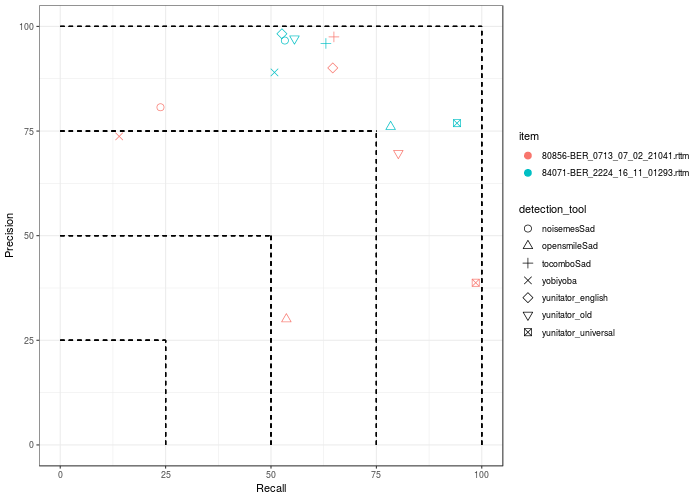

In [41]:
%%R -w 700 -h 500
detection_df$detection_tool = factor(detection_df$detection_tool)
p1 = ggplot(detection_df) + coord_cartesian(xlim = c(0,100), ylim = c(0,100)
) + geom_point(aes(x=detection.recall.., y=detection.precision.., 
colour=item, shape=detection_tool), size=3) + scale_shape_manual(values=1:nlevels(
detection_df$detection_tool)) + theme_bw() + xlab('Recall'
) + ylab('Precision') 

for (grid_line in c(25,50,75,100)){
    p1 <- (p1 + geom_segment(x=0, y=grid_line, xend=grid_line, yend=grid_line,
    linetype="dashed", alpha=.5) + geom_segment(x=grid_line, y=0, xend=grid_line,
    yend=grid_line, linetype="dashed", alpha=.5)) 
}

print(p1)
ggsave('figures/sad_precision_recall_tradeoff.pdf', width=8, height=5)

In [42]:
diarization_tools = ['diartk_noisemesSad','diartk_opensmileSad','diartk_tocomboSad',
    'yobiyoba','yunitator_old', 'yunitator_english', 'yunitator_universal' ]

In [43]:
diarization_df = getTableForMetric(diarization_tools,'diaer')
%R -i diarization_df
diarization_df

/home/stephan/.local/lib/python3.5/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


,item,diarization error rate %,total,correct,correct %,false alarm,false alarm %,missed detection,missed detection %,confusion,confusion %,file,detection_tool
0,80856-BER_0713_07_02_21041.rttm,95.084991,75.89,7.81,10.291211,4.08,5.376202,59.05,77.809988,9.03,11.898801,80856-BER_0713_07_02_21041,diartk_noisemesSad
1,84071-BER_2224_16_11_01293.rttm,89.943362,224.23,26.47,11.804843,3.92,1.748205,114.60,51.108237,83.16,37.086920,84071-BER_2224_16_11_01293,diartk_noisemesSad
0,80856-BER_0713_07_02_21041.rttm,183.792331,75.89,24.82,32.705231,88.41,116.497562,37.99,50.059296,13.08,17.235472,80856-BER_0713_07_02_21041,diartk_opensmileSad
1,84071-BER_2224_16_11_01293.rttm,114.150649,224.23,19.13,8.531419,50.86,22.682068,63.25,28.207644,141.85,63.260937,84071-BER_2224_16_11_01293,diartk_opensmileSad
0,80856-BER_0713_07_02_21041.rttm,84.029516,75.89,13.31,17.538543,1.19,1.568059,30.02,39.557254,32.56,42.904203,80856-BER_0713_07_02_21041,diartk_tocomboSad
1,84071-BER_2224_16_11_01293.rttm,63.042412,224.23,88.44,39.441645,5.57,2.484057,94.72,42.242340,41.07,18.316015,84071-BER_2224_16_11_01293,diartk_tocomboSad
0,80856-BER_0713_07_02_21041.rttm,92.041112,75.89,9.54,12.570826,3.50,4.611938,66.07,87.060219,0.28,0.368955,80856-BER_0713_07_02_21041,yobiyoba
1,84071-BER_2224_16_11_01293.rttm,65.241047,224.23,90.78,40.485216,12.84,5.726263,120.27,53.636891,13.18,5.877893,84071-BER_2224_16_11_01293,yobiyoba
0,80856-BER_0713_07_02_21041.rttm,71.840822,75.89,45.85,60.416392,24.48,32.257214,19.57,25.787324,10.47,13.796284,80856-BER_0713_07_02_21041,yunitator_old
1,84071-BER_2224_16_11_01293.rttm,65.129554,224.23,81.63,36.404585,3.44,1.534139,110.57,49.310975,32.03,14.284440,84071-BER_2224_16_11_01293,yunitator_old


 [1] "item"                     "diarization.error.rate.."
 [3] "total"                    "correct"                 
 [5] "correct.."                "false.alarm"             
 [7] "false.alarm.."            "missed.detection"        
 [9] "missed.detection.."       "confusion"               
[11] "confusion.."              "file"                    
[13] "detection_tool"          


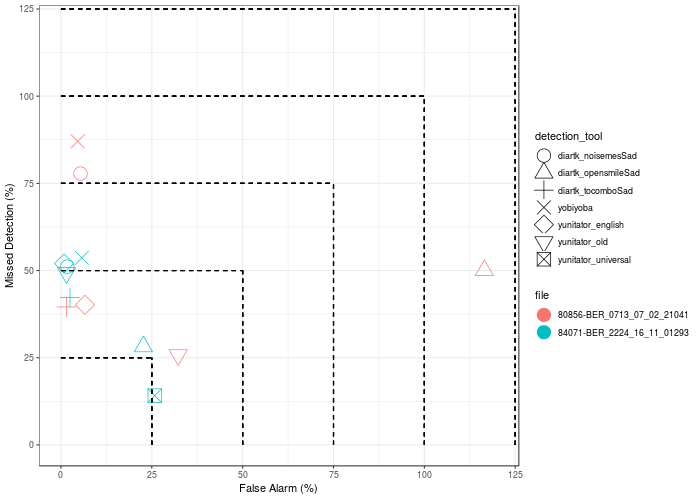

In [46]:
%%R -h 500 -w 700
print(names(diarization_df))
p1 = ggplot(diarization_df) + geom_point(aes(x=false.alarm.., y=missed.detection.., colour=file, 
shape = detection_tool), size=6) + scale_shape_manual(values=1:nlevels(
detection_df$detection_tool)) + coord_cartesian(xlim=c(0,120), ylim=c(0,120)
) + theme_bw() + ylab('Missed Detection (%)')+ xlab('False Alarm (%)')

for (grid_line in c(25,50,75,100, 125)){
    p1 <- (p1 + geom_segment(x=0, y=grid_line, xend=grid_line, yend=grid_line,
    linetype="dashed", alpha=.5) + geom_segment(x=grid_line, y=0, xend=grid_line,
    yend=grid_line, linetype="dashed", alpha=.5)) 
}



print(p1)
ggsave('figures/diarization_falsealarm_misseddetection.pdf', width=8, height=5)

 [1] "item"                     "diarization.error.rate.."
 [3] "total"                    "correct"                 
 [5] "correct.."                "false.alarm"             
 [7] "false.alarm.."            "missed.detection"        
 [9] "missed.detection.."       "confusion"               
[11] "confusion.."              "file"                    
[13] "detection_tool"          


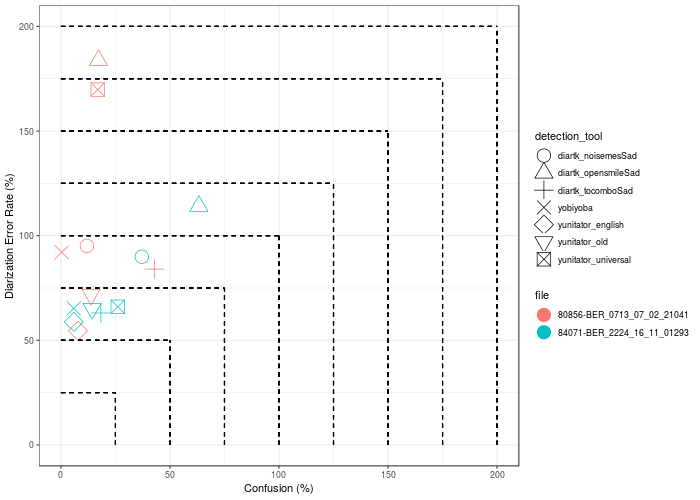

In [48]:
%%R -h 500 -w 700
print(names(diarization_df))
p1 = ggplot(diarization_df) + geom_point(aes(x=confusion.., y=diarization.error.rate.., colour=file, 
shape = detection_tool), size=6
) + scale_shape_manual(values=1:nlevels( detection_df$detection_tool)) + theme_bw(
) + ylab('Diarization Error Rate (%)')+ xlab('Confusion (%)')

for (grid_line in c(25,50,75,100, 125, 150, 175,200)){
    p1 <- (p1 + geom_segment(x=0, y=grid_line, xend=grid_line, yend=grid_line,
    linetype="dashed", alpha=.5) + geom_segment(x=grid_line, y=0, xend=grid_line,
    yend=grid_line, linetype="dashed", alpha=.5))  
}

p1 = p1 + coord_cartesian(xlim=c(0,200), ylim=c(0,200))

print(p1)
ggsave('figures/diarization_confusion_errrate.pdf', width=8, height=5)

# Word Error Rate

In [59]:
import re
import string
from jiwer import wer

def getYobiYobaWords(recording):
    xml_path = dataPath+recording+'.mp3_eng-usa_6.0.xml'
    word_df = readYobiYoba(xml_path, returnType = 'words')
    wordstring = ' '.join([x.lower() for x in word_df.text])
    wordstring = wordstring.translate(str.maketrans('', '', string.punctuation))
    wordstring = re.sub(r' +', ' ', wordstring)    
    return(wordstring.strip())

def getGoldStandardWords(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()
    wordstring = ' '.join([x.text.lower() for x in root.iter('ANNOTATION_VALUE') if x.text is not None])
    wordstring = wordstring.translate(str.maketrans('', '', string.punctuation))    
    wordstring = re.sub(r' +', ' ', wordstring)    
    wordstring = re.sub(r'\\[.*?\\]', '', wordstring)    
    wordstring = re.sub(r'\\{', '', wordstring)    
    wordlist = re.sub(r'\\}', '', wordstring).split(' ')    
    excludes = ['0','n','y','zzz','c','w','l','m','a','u','xxx', 'mm','pa','1']
    wordlist = [x for x in wordlist if x not in excludes]
    print('Processed:')
    print(wordlist)
    return(' '.join(wordlist))
    
def computeWER(recording):
    gs_for_file = {
        "80856-BER_0713_07_02_21041": "121251-BER_0713_07_02_21041-CP.eaf",
        "84071-BER_2224_16_11_01293": "121253-BER_2224_16_11_01293-CP.eaf"
    }
    
    xml_path = '/shared_hd1/VMs/DiViMe/data/'+gs_for_file[recording]
    yy_words = getYobiYobaWords(recording)
    gs_words = getGoldStandardWords(xml_path)
    print('Hypothesized annotation:')
    print(yy_words)
    print('Gold Standard Annotation:')
    print(gs_words)
    print(wer(gs_words,yy_words))

In [60]:
computeWER('80856-BER_0713_07_02_21041')

Processed:
['yeah', 'imitates', 'imitates', 'okay', 'you', 'want', 'food', 'you', 'want', 'bottle', 'oh', 'oh', 'no', 'oh', 'my', 'goodness', 'oh', 'oh', 'no', 'your', 'life', 'is', 'horrible', 'oh', 'oh', 'jeez', 'oh', 'no', 'oh', 'yeah', 'were', 'gonna', 'do', 'it', 'in', 'one', 'oh', 'i', 'missed', 'some', 'two', 'three', 'yeah', 'oh', 'boy', 'okay', 'okay', 'here', 'we', 'go', 'heres', 'your', 'oh', 'i', 'know', 'i', 'know', 'i', 'know', 'i', 'know', 'oh', 'boy', 'oh', 'boy']
Hypothesized annotation:
has oh boy oh here we go heres your oh i know i know no no oh boy oh boy yes yes
Gold Standard Annotation:
yeah imitates imitates okay you want food you want bottle oh oh no oh my goodness oh oh no your life is horrible oh oh jeez oh no oh yeah were gonna do it in one oh i missed some two three yeah oh boy okay okay here we go heres your oh i know i know i know i know oh boy oh boy
0.7846153846153846


In [62]:
computeWER('84071-BER_2224_16_11_01293')

Processed:
['what', 'color', 'did', 'it', 'turn', 'his', 'shoes', 'red', 'did', 'pete', 'cry', 'goodness', 'no', 'he', 'kept', 'walking', 'along', 'and', 'singing', 'his', 'song', 'i', 'love', 'my', 'red', 'shoes', 'sings', 'i', 'love', 'my', 'red', 'shoes', 'sings', 'i', 'love', 'my', 'red', 'shoes', 'sings', 'oh', 'no', 'pete', 'stepped', 'in', 'large', 'pile', 'of', 'blueberries', 'what', 'color', 'did', 'it', 'turn', 'his', 'shoes', 'blueberries', 'turned', 'his', 'shoes', 'blue', 'did', 'pete', 'cry', 'what', 'mmhm', 'did', 'pete', 'cry', 'goodness', 'no', 'he', 'kept', 'walking', 'along', 'and', 'singing', 'his', 'song', 'i', 'love', 'my', 'blue', 'shoes', 'sings', 'i', 'love', 'my', 'blue', 'shoes', 'sings', 'i', 'love', 'my', 'blue', 'shoes', 'sings', 'oh', 'no', 'pete', 'stepped', 'in', 'large', 'puddle', 'of', 'mud', 'laughs', 'what', 'color', 'did', 'it', 'turn', 'his', 'shoes', 'brown', 'did', 'pete', 'cry', 'oh', 'goodness', 'no', 'he', 'kept', 'walking', 'along', 'and', '